In [ ]:
## the best model was with the time step of 60 
## google stock price prediction

In [1]:
# Importing the libraries without dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 31s 26ms/step - loss: 0.0557
Epoch 2/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0032
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0020
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0019
Epoch 5/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0019
Epoch 6/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0018
Epoch 7/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0019
Epoch 8/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0018
Epoch 9/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0017
Epoch 10/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0023
Epoch 11/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0016
Epoc

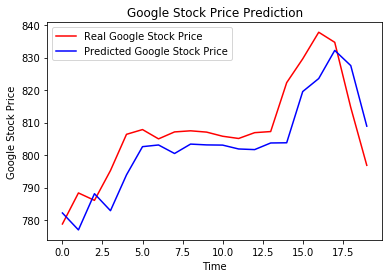

In [9]:
# Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# model with drop out

In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
 #we see the difference in the shape of X_train and training_set_scaled of 60 observation becuse we used i range from 60
# Xtrain has 1198 rows  with 60 column
X_train.shape

(1198, 60)

In [16]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [17]:
# shape of the ytrain
y_train.shape

(1198,)

In [18]:
# Reshaping(adding predictor to the dataset with currently working) fro keras documentation we will find that the input sahpe for
# recurrent neural network 3D tensor first is batch size which is equivalent to number of observation , 2nd is time step and 3rd
#is predictor that is needed for prediction# in our case is 1 predictor
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
X_train.shape

(1198, 60, 1)

In [21]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0524
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [===================

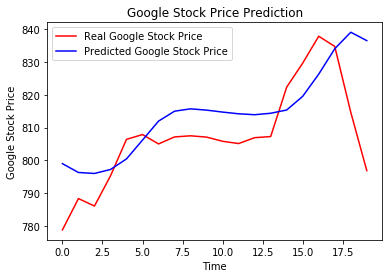

In [22]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
    
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
#inputs
#dataset_total
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
